# Insurance Charges Analysis Using Linear Regression

**Project Overview:**  
The goal of this project is to analyze health insurance data provided by ACME Insurance Inc., a company that offers affordable health coverage to thousands of customers across the United States. The dataset includes information from over 1,300 individuals. Using features such as age, sex, BMI, number of children, smoking status, and region of residence, we aim to build a model that predicts insurance charges using a Linear Regression Model.

---

This project is based on a step-by-step tutorial for guided learning.

Source :
https://jovian.ai/aakashns/python-sklearn-linear-regression

---

**Data source**
'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'


# Imported Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Loading Data

In [3]:
medical_df = pd.read_csv("data/DATA.csv")



### Initial Data Exploration

The dataset comprises 1,338 entries and 7 features, with each row representing a unique customer. Our primary objective is to develop a method for predicting the value of the **"charges"** column—representing insurance costs—based on the other available features.

If we can accurately model these charges using historical data, we can extend that model to estimate costs for new customers by collecting basic information such as **age**, **sex**, **BMI**, **number of children**, **smoking status**, and **region of residence**.

Among these, **age**, **BMI**, **number of children**, and **charges** are numerical variables, while **sex**, **smoker**, and **region** are categorical. Fortunately, the dataset is complete with no missing values, which simplifies our preprocessing and allows us to focus directly on analysis and modeling.



In [4]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB




### Data Quality and Distribution Insights

The numerical features appear to fall within logical and acceptable ranges—for example, there are no negative ages or unrealistic BMI values—so minimal data cleaning is required. However, the **"charges"** column exhibits a noticeable skew. The distribution is heavily right-skewed, with a large gap between the median and the maximum value, indicating that a relatively small number of customers are incurring exceptionally high insurance costs.

In [5]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010



### Age Distribution

The **age** column is a numerical feature, ranging from 18 to 64 years. To better understand how age is distributed across the dataset, we can visualize it using a histogram with 47 bins—each representing a single year of age. Additionally, a box plot will help highlight the spread, central tendency, and any potential outliers in the data. We'll use **Plotly** to create interactive charts for a more engaging and insightful exploration.

In [6]:

fig = px.histogram(medical_df,
             x="age",
             marginal="box",
             nbins=47,
             title="Histogram of Age"
             )
fig.update_layout(bargap=0.1)

fig.show()


The distribution of ages in the dataset is nearly uniform, with most age groups represented by approximately 20 to 30 customers. However, there's a noticeable spike at the lower end of the range—**ages 18 and 19** have more than double the number of entries compared to other ages. This suggests a higher concentration of younger policyholders just entering adulthood, which might warrant further investigation.


# BMI Distribution
Let's look at the distribution of BMI (Body Mass Index) of customers, using a histogram and box plot.



In [7]:
fig = px.histogram(medical_df,
             x="bmi",
             marginal="box",
             nbins=47,
             color_discrete_sequence=["red"],
             title="Histogram of BMI"
             )
fig.update_layout(bargap=0.1)

fig.show()


### BMI Distribution

The **Body Mass Index (BMI)** values in the dataset follow an approximately **normal (Gaussian) distribution** centered around **30**, which is classified as the threshold for obesity. This bell-shaped curve suggests that most individuals in the dataset have BMI values clustered near this average.

There are a few outliers on the higher end, which is expected in real-world data—particularly in health-related datasets—due to lifestyle variations, medical conditions, or regional dietary habits. These higher BMI values may represent individuals at greater health risk, which could significantly impact their insurance charges.




### Visualizing Insurance Charges

Next, we'll explore the distribution of **"charges"**, which represents the annual medical expenses for each customer. Since this is the target variable we aim to predict, understanding its distribution is crucial.

To add more insight, we’ll segment the data by the **"smoker"** category, allowing us to compare the charges for smokers and non-smokers. This breakdown can reveal how smoking habits influence medical costs—something we expect to have a significant impact based on health risk factors. We'll use visualizations such as histograms or box plots to highlight these differences clearly.



In [8]:
fig = px.histogram(medical_df,
             x="charges",
             marginal="box",
             nbins=47,
             color= "smoker",
             color_discrete_sequence=["grey", "green"],
             title="Histogram of charges"
             )
fig.update_layout(bargap=0.1)
fig.show()



### Key Observations from the Charges Distribution

- **Most customers incur medical charges below \$10,000** per year. Only a small subset of individuals face significantly higher expenses, likely due to serious health conditions such as major illnesses, accidents, or genetic disorders. This results in a **right-skewed distribution** that resembles a **power law**, where a few individuals account for a large portion of total costs.

- **Smoking status has a dramatic impact on medical expenses**.  
  - The **median annual charge for non-smokers** is approximately **\$7,300**.  
  - In contrast, **smokers have a median charge close to \$35,000**, nearly five times higher.  
  This stark difference underscores the strong influence of smoking on healthcare costs and suggests that the **"smoker"** feature will be a key predictor in our model.




### Exploring the Relationship Between Age and Charges

To better understand how **age** influences **medical charges**, we'll create a **scatter plot** where each point represents an individual customer. The x-axis will represent **age**, while the y-axis shows the corresponding **annual charges**.

To add another layer of insight, we'll color the points based on the customer's **smoking status**. This will help us observe how the relationship between age and charges differs for **smokers vs. non-smokers**, and whether smoking amplifies the cost with age.

This visualization can reveal trends such as:
- Whether charges increase with age.
- How much more smokers tend to pay across different age groups.
- The presence of any clusters or outliers worth investigating.


In [9]:
fig = px.scatter(medical_df,
           x="age",
           y="charges",
           color="smoker",
           opacity=0.55)
fig.show()



### Insights from the Age vs. Charges Scatter Plot

- There is a **clear upward trend** in medical charges with increasing age, which aligns with expectations—older individuals generally face higher healthcare costs.  
  However, there is **significant variability at each age**, indicating that **age alone is not a strong predictor** of medical charges.

- The scatter plot reveals **three distinct clusters** of data points, each following a roughly linear pattern with increasing slope:

  1. **Cluster 1: Healthy Non-Smokers**  
     This is the **largest group**, consisting primarily of **non-smokers with relatively low medical expenses**. Their charges remain fairly moderate across all ages, suggesting minimal ongoing medical issues.

  2. **Cluster 2: Mixed Group**  
     This cluster includes a **blend of smokers and non-smokers**. It's possible this represents two overlapping subgroups:  
     - Non-smokers with underlying **health conditions**, leading to higher-than-average costs.  
     - Smokers who are currently **not experiencing major health complications**.

  3. **Cluster 3: High-Risk Smokers**  
     This group consists **exclusively of smokers** with **very high medical expenses**. These individuals likely suffer from **serious, smoking-related health conditions**, pushing their charges to the upper extremes.

These patterns highlight the importance of combining **age, smoking status**, and possibly other factors when building a model to predict medical charges.

# BMI and charges

In [11]:
fig = px.scatter(medical_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.show()


From the data, we observe that **for non-smokers**, higher **BMI** does **not show a strong correlation** with increased medical charges. Medical expenses remain relatively stable across different BMI values, even beyond the obesity threshold of 30.

In contrast, **smokers with a BMI over 30** tend to incur **substantially higher medical charges**. This suggests a possible **compounding effect**, where the combination of **smoking and obesity** significantly raises the risk of serious health issues, leading to higher insurance costs.

This pattern reinforces the importance of considering **interactions between features**—in this case, BMI and smoking status—when building a predictive model.




### Identifying Relationships with Charges

From our analysis, it's clear that some features have a stronger relationship with **medical charges** than others. For example, **"age"** and **"charges"** tend to increase together, indicating a positive correlation. In contrast, **"BMI"** does not show a consistent trend with charges, especially among non-smokers.

To **quantify** these relationships, we can use a statistical measure called the **correlation coefficient**. This value ranges from -1 to 1 and helps determine the strength and direction of a linear relationship between two variables. In **Pandas**, we can compute the correlation using the `.corr()` method on a DataFrame or Series.

This step provides a more objective view of which features are most informative for predicting **charges**.



In [17]:
medical_df.charges.corr(medical_df.age)


np.float64(0.2990081933306476)

In [19]:
medical_df.charges.corr(medical_df.bmi)


np.float64(0.19834096883362878)

In [ ]:
smoking_values = {"yes" : 1, "no" : 0}
sex_values = {"male" : 1, "female" : 0}
medical_df.smoker =  medical_df.smoker.map(smoking_values)
medical_df.sex = medical_df.sex.map(sex_values)
corr_df = medical_df.drop(columns=['region'])

               age       sex       bmi  children    smoker   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000  0.787251
charges   0.299008  0.057292  0.198341  0.067998  0.787251  1.000000


In [34]:
corr_df.corr()

,age,sex,bmi,children,smoker,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000


<Axes: >

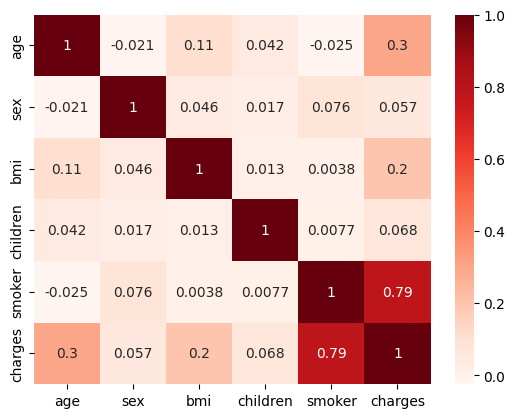

In [35]:
sns.heatmap(corr_df.corr(), cmap='Reds', annot=True)



### Overall Observations

- **Correlation Coefficient Range:**  
  Values range between -1 and 1, where values closer to 1 indicate a strong positive linear relationship, values closer to -1 indicate a strong negative linear relationship, and values near 0 suggest little to no linear relationship.

- **Diagonal Values:**  
  The diagonal is 1.0 since each variable is perfectly correlated with itself.

---

### Key Feature Relationships

1. **Smoker and Charges (0.787251):**  
   - **Strong Positive Relationship:**  
     The most striking observation is that the “smoker” column has a very high positive correlation (≈0.79) with “charges”.  
   - **Interpretation:**  
     This implies that being a smoker is strongly associated with higher annual medical charges. In practical terms, smokers tend to incur much higher insurance costs, possibly due to increased health risks.

2. **Age and Charges (0.299008):**  
   - **Moderate Positive Relationship:**  
     Age shows a moderate positive correlation with charges.  
   - **Interpretation:**  
     As customers age, their medical charges tend to increase, which aligns with general expectations about healthcare costs rising with age.

3. **BMI and Charges (0.198341):**  
   - **Weak Positive Relationship:**  
     The correlation between BMI and charges is lower, suggesting that BMI alone is a less strong predictor of medical expenses compared to age or smoking status.  
   - **Interpretation:**  
     While there is a slight trend of higher BMI being associated with higher charges, this relationship is not as pronounced.

4. **Children and Charges (0.067998):**  
   - **Minimal Correlation:**  
     The number of children has almost negligible correlation with medical charges.  
   - **Interpretation:**  
     The number of dependents a customer has does not appear to significantly influence their medical expenses in this dataset.

5. **Sex and Charges (0.057292):**  
   - **Very Weak Relationship:**  
     The correlation between sex and charges is very low, suggesting that sex does not play a major role in determining medical charges here.  
   - **Interpretation:**  
     The data indicates that other factors, such as smoking status and age, are much more influential.

---

### Inter-Feature Correlations

- **Age, BMI, Children, and Sex:**  
  The correlations among these features are all very low (close to zero), indicating that they do not strongly influence each other. This lack of multicollinearity is beneficial for modeling, as it suggests that each of these features could provide unique information about the charges without redundant overlap.

- **Smoker’s Relationship with Other Features:**  
  Aside from its strong correlation with charges, the “smoker” column does not show strong correlations with age, BMI, children, or sex, further highlighting that its effect on charges is largely independent.

---

### Summary

- **Dominant Predictor:**  
  The “smoker” attribute is a dominant predictor of medical charges, which aligns with the expectation that smoking significantly increases health risks and associated costs.

- **Moderate Influences:**  
  Age also contributes to higher charges, although to a lesser extent.

- **Weaker or Minimal Predictors:**  
  BMI, number of children, and sex have minimal direct correlations with charges in this dataset, suggesting they might need to interact with other features to have a more significant predictive effect.





### Working with Categorical Data

Up to this point, we’ve focused only on **numeric columns**, since most computations and model training require numerical input. However, important features like **"smoker"**, **"sex"**, and **"region"** are **categorical**, and incorporating them can help us build a more accurate and generalizable model.

To include these categorical columns, we first need to **convert them into numerical representations**. This process is known as **encoding**, and there are three common techniques:

1. **Binary Encoding (Label Encoding):**  
   - For columns with **only two categories** (binary), we can simply map them to **0 and 1**.  
   - Example: `"smoker"` → `"yes"` = 1, `"no"` = 0.  
   - This approach also works for `"sex"` since it has two values: `"male"` and `"female"`.

2. **One-Hot Encoding:**  
   - For columns with **more than two categories**, we use **one-hot encoding**.  
   - This involves creating a **separate column for each category**, with binary values (0 or 1) indicating the presence of that category.
   - Example: `"region"` has 4 values (e.g., northeast, northwest, southeast, southwest), so we’ll create **4 new columns**, each representing one region.

3. **Ordinal Encoding:**  
   - If the categories have a **natural order** (e.g., low < medium < high), we can assign them ordered numbers (e.g., 1, 2, 3).
   - These are called **ordinal variables**, but in our dataset, none of the categorical columns follow a natural order, so this method isn't applicable here.

---

### Applying Encoding to Our Dataset

- We’ve already applied **binary encoding** to `"smoker"` and `"sex"` by converting them to 0s and 1s.  
- Now, we’ll use **one-hot encoding** on the `"region"` column, transforming it into four binary columns—one for each region. This allows our model to process and learn from all the available information, without introducing unintended bias from arbitrary numeric assignments.


In [38]:
from sklearn import preprocessing

enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[["region"]])

one_hot = enc.transform(medical_df[["region"]]).toarray()
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot


In [39]:
medical_df

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,northwest,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,0,northeast,2205.98080,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,0,southeast,1629.83350,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,0,southwest,2007.94500,0.0,0.0,0.0,1.0


In [40]:
smoker_df = medical_df[medical_df["smoker"] == 1 ]
non_smoker_df = medical_df[medical_df["smoker"] == 0 ]

X_smoke = smoker_df[[ "age", "children", "bmi", "smoker", "sex", 'northeast', 'northwest', 'southeast', 'southwest']]
Y_smoke = smoker_df[["charges"]]


X_non_smoke = non_smoker_df[[ "age", "children", "bmi", "smoker", "sex", 'northeast', 'northwest', 'southeast', 'southwest']]
Y_non_smoke = non_smoker_df[["charges"]]


X_both = medical_df[[ "age", "children", "bmi", "smoker", "sex", 'northeast', 'northwest', 'southeast', 'southwest']]
Y_both = medical_df[["charges"]]

Overall RMSE: 6041.6796511744515
Smokers RMSE: 5668.4678821121515
Non-Smokers RMSE: 4573.074988795492


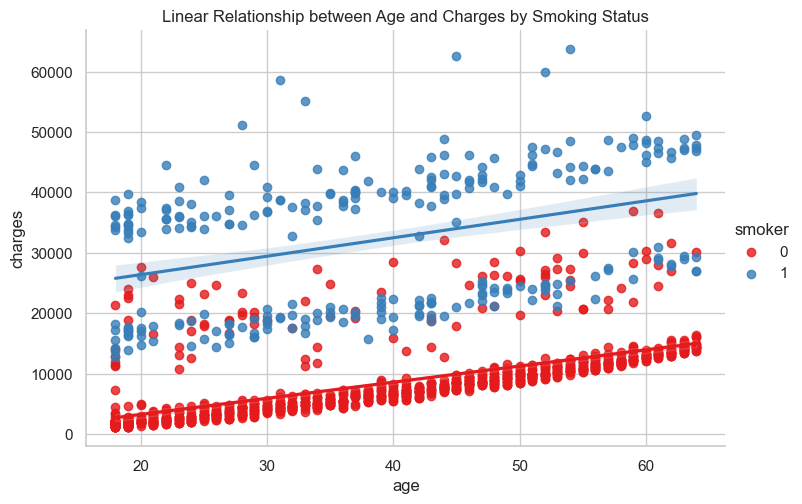

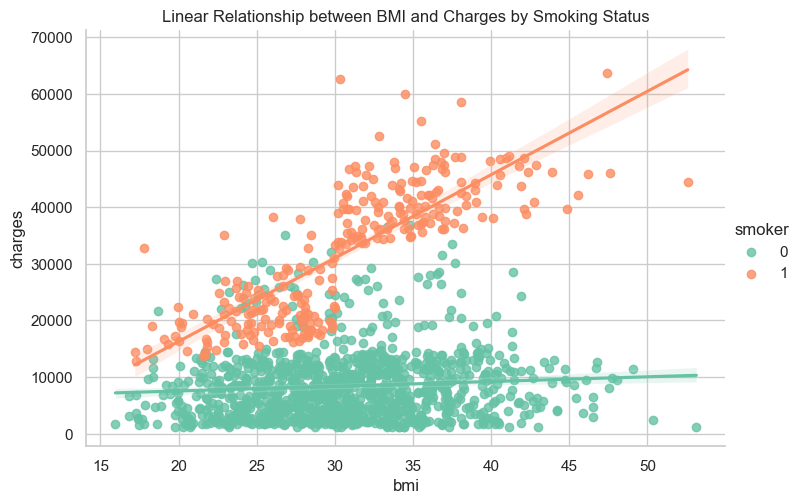

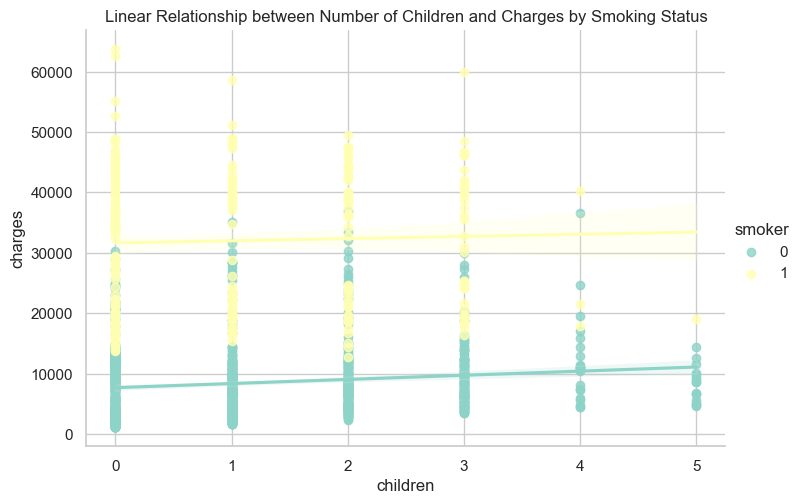

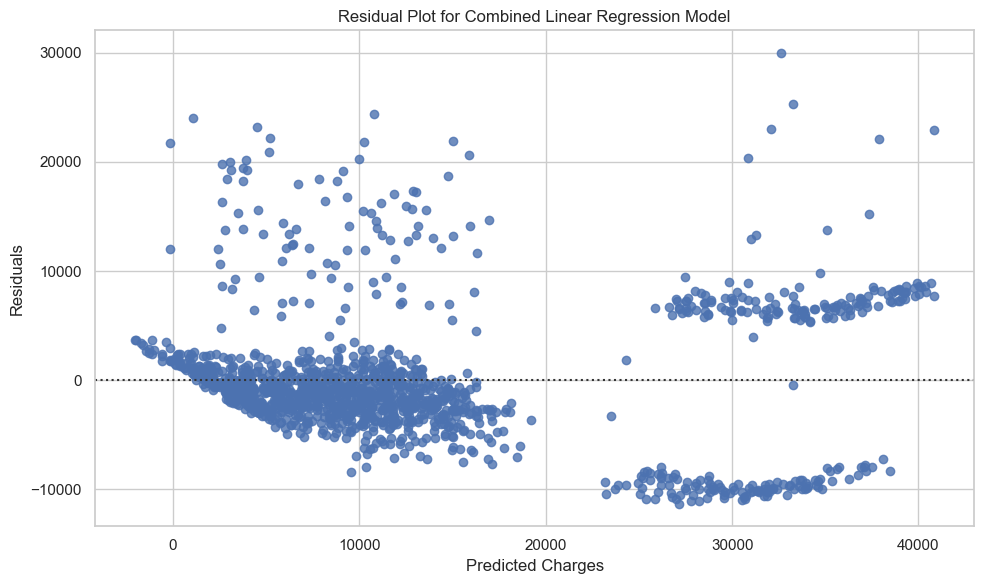

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


model_both = LinearRegression().fit(X_both, Y_both)
predictions_both = model_both.predict(X_both)
loss_both = np.sqrt(mean_squared_error(Y_both, predictions_both))
print("Overall RMSE:", loss_both)

model_smoke = LinearRegression().fit(X_smoke, Y_smoke)
predictions_smoke = model_smoke.predict(X_smoke)
loss_smoke = np.sqrt(mean_squared_error(Y_smoke, predictions_smoke))
print("Smokers RMSE:", loss_smoke)

model_non_smoke = LinearRegression().fit(X_non_smoke, Y_non_smoke)
predictions_non_smoke = model_non_smoke.predict(X_non_smoke)
loss_non_smoke = np.sqrt(mean_squared_error(Y_non_smoke, predictions_non_smoke))
print("Non-Smokers RMSE:", loss_non_smoke)

sns.set(style="whitegrid")

sns.lmplot(data=medical_df, x="age", y="charges", hue="smoker", palette="Set1", height=5, aspect=1.5)
plt.title("Linear Relationship between Age and Charges by Smoking Status")

sns.lmplot(data=medical_df, x="bmi", y="charges", hue="smoker", palette="Set2", height=5, aspect=1.5)
plt.title("Linear Relationship between BMI and Charges by Smoking Status")

sns.lmplot(data=medical_df, x="children", y="charges", hue="smoker", palette="Set3", height=5, aspect=1.5)
plt.title("Linear Relationship between Number of Children and Charges by Smoking Status")

fig, ax = plt.subplots(figsize=(10, 6))
sns.residplot(x=predictions_both.flatten(), y=(Y_both.values.flatten() - predictions_both.flatten()), ax=ax)
ax.set_title("Residual Plot for Combined Linear Regression Model")
ax.set_xlabel("Predicted Charges")
ax.set_ylabel("Residuals")

plt.tight_layout()
plt.show()



### Some maths

#### 1. **Linear Regression Model**

At the heart of this study is the **Ordinary Least Squares (OLS) linear regression model**, which assumes a linear relationship between the independent variables (features) and the dependent variable (target). For each customer, the model can be expressed as:

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p + \epsilon$$

- $y$ is the target variable (annual medical charges).
- $x_1, x_2, \dots, x_p$ are the independent variables (such as age, BMI, number of children, smoker indicator, sex, and one-hot encoded region features).
- $\beta_0$ is the intercept, and $\beta_1, \dots, \beta_p$ are the coefficients that quantify the influence of each predictor.
- $\epsilon$ represents the error term capturing the variation not explained by the model.

#### 2. **Objective Function (Minimizing Error)**

The OLS method finds the coefficients $\beta$ by minimizing the **sum of squared residuals (errors)**:

$$\min_{\beta} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

where the prediction for the $i^{th}$ data point is:

$$\hat{y}_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_p x_{ip}$$

In matrix notation, if $\mathbf{X}$ is the design matrix (with an added column of 1’s for the intercept) and $\mathbf{y}$ is the vector of target values, the optimal coefficients are given by:

$$\boldsymbol{\beta} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}$$

#### 3. **Error Metric: Root Mean Squared Error (RMSE)**

To quantify the model’s prediction error, we use the **Root Mean Squared Error (RMSE)**, which is defined as:

$$\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

This metric provides an estimate of the average prediction error in the same units as the target variable (i.e., dollars in this case).

---

### Detailed Comments on the Plots

#### **Scatter Plots with Regression Lines (lmplot)**
- **Age vs. Charges:**
  - **Observation:** The plot displays a positive trend where charges tend to increase with age. The regression line (separated by smoker status) illustrates that although age contributes to higher charges, its effect differs between smokers and non-smokers.
  - **Interpretation:** For non-smokers, the increase in charges with age is more gradual. In contrast, for smokers, the slope is steeper, suggesting that the adverse effects of smoking amplify the influence of age on medical expenses.
  
- **BMI vs. Charges:**
  - **Observation:** This plot shows that, for non-smokers, BMI does not have a strong linear relationship with charges. However, for smokers, especially those with BMI values over 30, there is a marked increase in charges.
  - **Interpretation:** The visual differentiation emphasizes that while BMI alone might be a weak predictor overall, its interaction with smoking status becomes critical. This indicates that being overweight or obese is particularly risky in the presence of smoking.
  
- **Children vs. Charges:**
  - **Observation:** The relationship between the number of children and charges appears less pronounced, with a very slight trend, if any.
  - **Interpretation:** This suggests that while having more children might have some influence (perhaps due to family-related healthcare decisions), it is not as strong a determinant of individual medical charges compared to age or smoking status.

#### **Residual Plot**
- **Observation:** The residual plot displays the differences between the actual charges and the model’s predictions. Ideally, the residuals should be randomly scattered around zero without any discernible pattern.
- **Interpretation:** A random scatter of residuals indicates that the model has appropriately captured the linear relationships in the data. If the residuals show a pattern (e.g., curvature), it might imply that a linear model is insufficient and that other factors or a non-linear model might better explain the variance in charges.


### Conclusion

This project-analysis demonstrates how a comprehensive analysis using linear regression can uncover key insights into the factors influencing medical charges. By rigorously applying the principles of Ordinary Least Squares regression, we quantified the impact of various features—most notably, smoking status and age—on annual healthcare expenses. The analysis revealed that smokers incur significantly higher charges, a trend that is further amplified by factors like age and BMI. In contrast, features such as the number of children and sex showed minimal direct influence.

Visualizations using Seaborn provided an intuitive understanding of these relationships, with scatter plots and regression lines highlighting the distinct trends for smokers and non-smokers. The residual plot confirmed that the linear model adequately captured the underlying patterns in the data, suggesting that our approach was well-suited for predicting medical charges.

Overall, the findings emphasize the importance of feature selection and proper encoding of categorical variables in building predictive models. This analysis not only supports the practical application of linear regression in the healthcare domain but also underlines the value of combining statistical rigor with visual exploration to draw actionable insights.